In [296]:
#For Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

#For Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#Filter warnings
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

#### Loading datasets

In [297]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [298]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [299]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Converting the categorical features to numeric features.


*Here in Gender feature 0 indicate Male and 1 indicate Female*

In [300]:
le = LabelEncoder()

for i in train.columns:
    
    if train[i].dtypes=='object':
        train[i]= le.fit_transform(train[i])
        test[i] = le.fit_transform(test[i])

In [301]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2734,1,6,16,2,4,0,8,NaN,NaN,7969


In [302]:
train.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,1707.473323,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,1012.201109,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,930.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,1666.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,2550.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


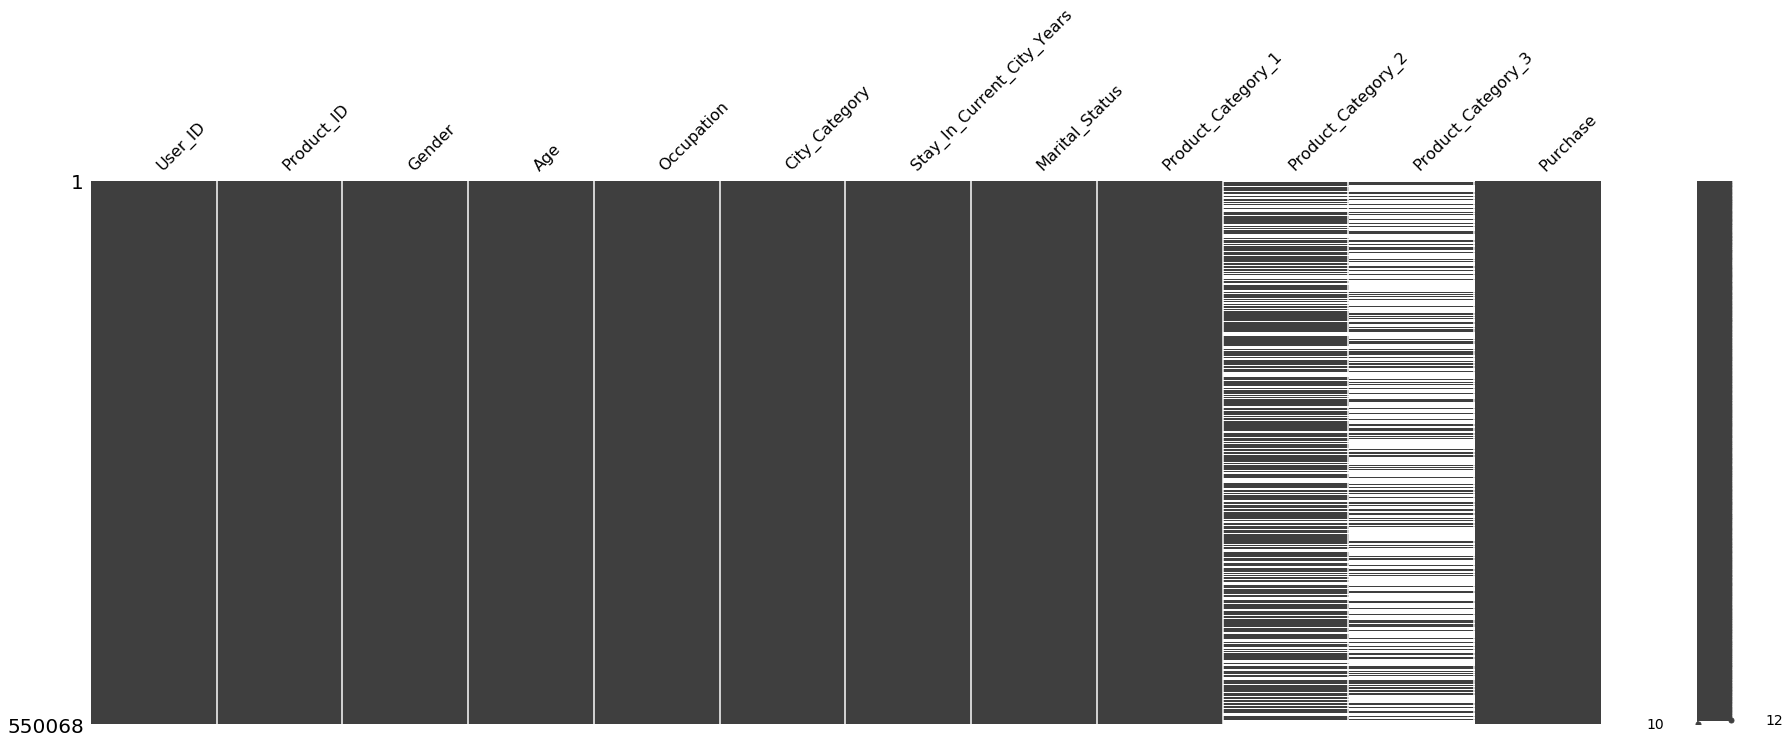

In [303]:
#Visually check missing values in the train dataset
missingno.matrix(train,figsize=(30,10))

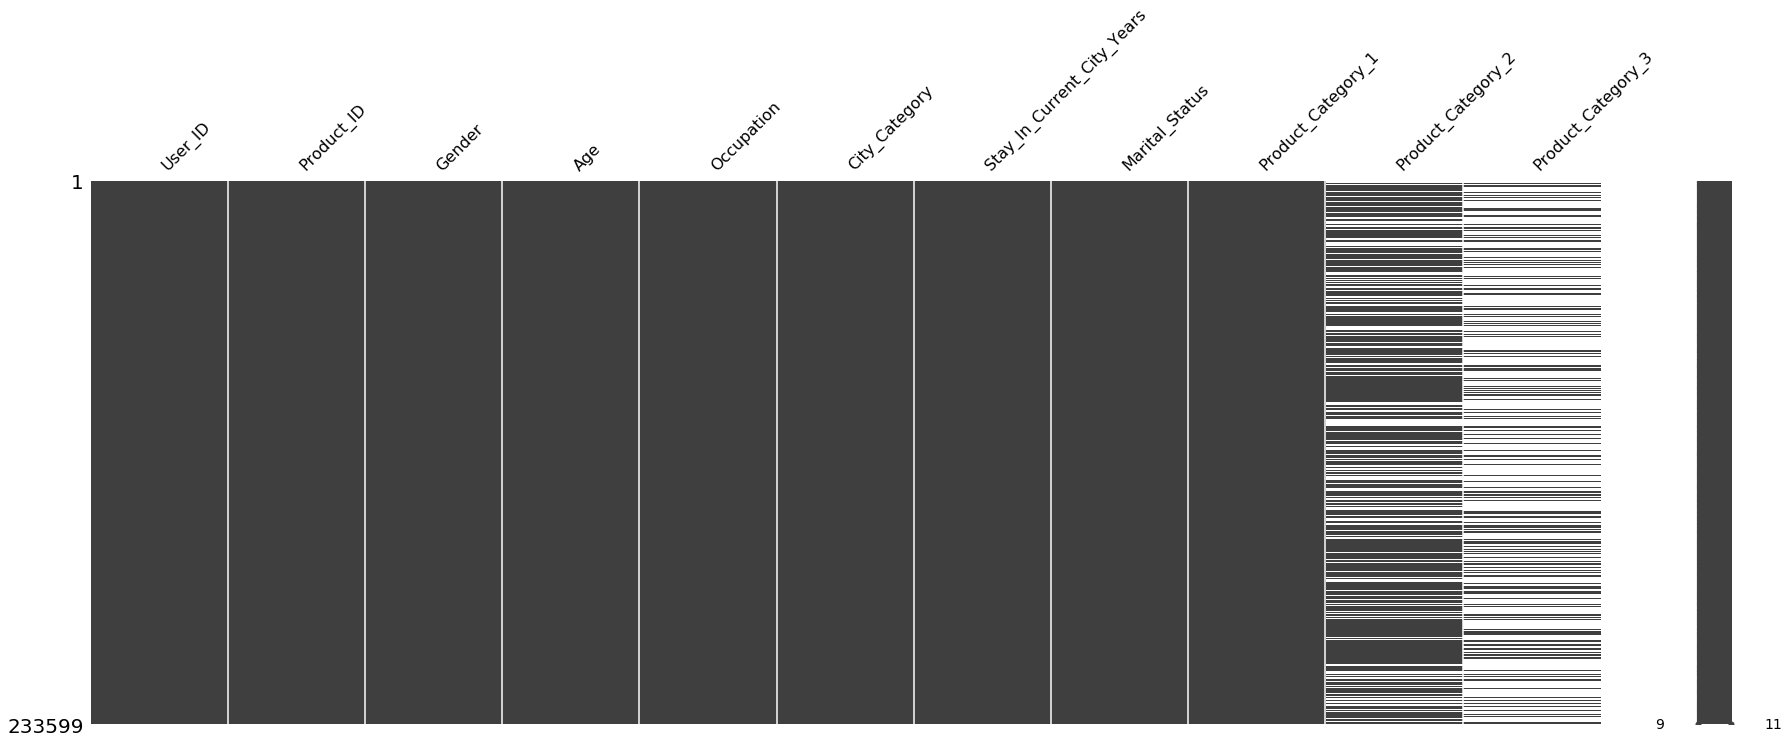

In [304]:
#Visually check missing values in the test dataset
missingno.matrix(test,figsize=(30,10))

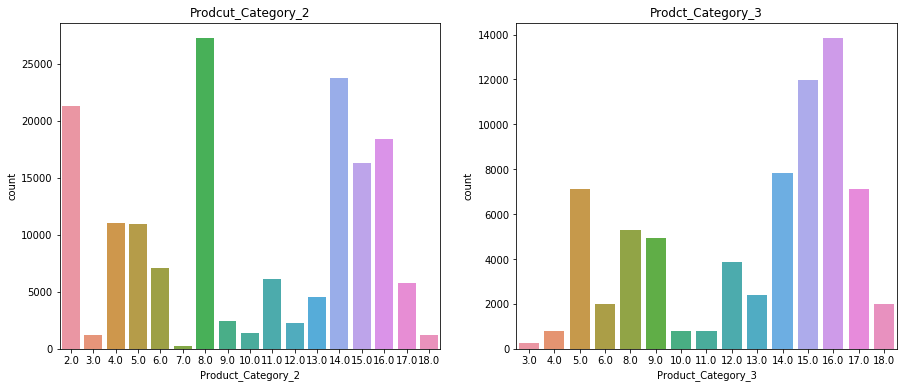

In [305]:
fig, ax = plt.subplots(1,2, figsize=[15,6])

ax[0].set_title("Prodcut_Category_2")
sns.countplot(test.Product_Category_2, ax=ax[0])

ax[1].set_title("Prodct_Category_3")
sns.countplot(test.Product_Category_3, ax=ax[1])

In [321]:
def fill_nan_random(column):
    colVal=column.values
    nanSize= np.isnan(colVal)

    colVal[nanSize] = np.random.randint(2,18, size=nanSize.sum())
    return column

In [323]:
fill_nan_random(train['Product_Category_2'])
fill_nan_random(test['Product_Category_2'])

0         11.0
1          5.0
2         14.0
3          9.0
4          5.0
5          3.0
6         11.0
7          4.0
8         13.0
9         14.0
10         2.0
11         3.0
12         8.0
13         8.0
14        15.0
15        17.0
16         8.0
17         8.0
18         8.0
19         3.0
20        12.0
21         2.0
22         2.0
23         2.0
24         2.0
25        12.0
26         2.0
27         2.0
28        14.0
29        15.0
          ... 
233569    15.0
233570     5.0
233571    17.0
233572    13.0
233573    15.0
233574    15.0
233575     8.0
233576    16.0
233577     8.0
233578     2.0
233579     2.0
233580    14.0
233581    17.0
233582    11.0
233583     5.0
233584    11.0
233585     6.0
233586     2.0
233587    16.0
233588     8.0
233589    15.0
233590    14.0
233591     2.0
233592     8.0
233593    15.0
233594    11.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 233599, dtype: float64

In [292]:
train.loc[train['Product_Category_2'].isnull()==True, 'Product_Category_2']=train['Product_Category_2'].median()

test.loc[test['Product_Category_2'].isnull()==True, 'Product_Category_2']=test['Product_Category_2'].median()

In [324]:
print(test.info(),'\n------------------------')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null int32
Gender                        233599 non-null int32
Age                           233599 non-null int32
Occupation                    233599 non-null int64
City_Category                 233599 non-null int32
Stay_In_Current_City_Years    233599 non-null int32
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int32(5), int64(4)
memory usage: 15.1 MB
None 
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int32
Gender 

In [264]:
train.shape, test.shape

((550068, 12), (233599, 11))

Deleting duplicate value if any.      
There is not duplicate value.

In [265]:
a=train.duplicated(keep=False)

print("Data size before droping duplicate rows:", train.shape)

train.drop(train.index[a==True])

print("Data size after droping duplicate rows:", train.shape)

Data size before droping duplicate rows: (550068, 12)
Data size after droping duplicate rows: (550068, 12)


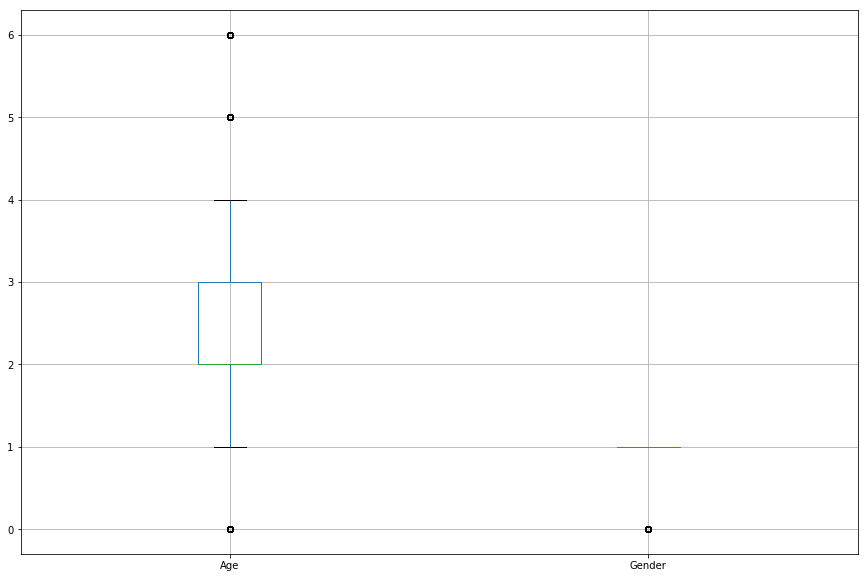

In [266]:
#sns.boxplot(['Age','Occupation','Stay_In_Current_City_Years'],data=t/rain)
plt.figure(figsize = (15, 10))
train.boxplot(["Age", 'Gender'])

In [267]:
train['Age'] = train['Age'].replace({0: 0.5})

In [268]:
train['Age'].shape

(550068,)

In [231]:
outliers = train['Age']

In [269]:
Q3 = outliers.quantile(0.75)
Q1 = outliers.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [270]:
ub =Q3 + (1.5 * IQR)
ub

4.5

In [271]:
train = train[~(outliers > ub)]
test = test[~(outliers > ub)]
train['Age'].shape, test['Age'].shape

((490063,), (207960,))

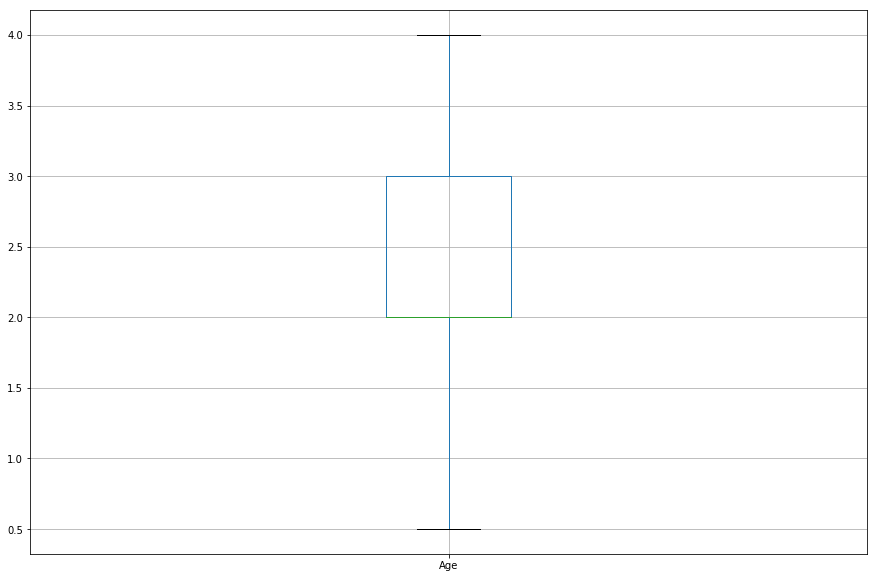

In [272]:
#sns.boxplot(['Age','Occupation','Stay_In_Current_City_Years'],data=t/rain)
plt.figure(figsize = (15, 10))
train.boxplot(["Age"])


In [273]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [274]:
X = train.drop(['Purchase','Product_Category_3'], axis=1)
x_train= train[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
                'Product_Category_2']]
y_train = train['Purchase']
x_test = test[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
               'Product_Category_2']]

In [206]:
x_test = x_test[:137517]

In [275]:
x_train.shape, y_train.shape, x_test.shape, ytest.shape


((490063, 10), (490063,), (207960, 10), (137517,))

## Modeling

#### Decision Tree

In [325]:
dt= DecisionTreeRegressor()

dt.fit(x_train,y_train)

predict1= dt.predict(x_train)
predict2= dt.predict(x_test)

predict22= [round(x) for x in predict2]
predict11= [round(x) for x in predict1]

print("Accuracy of the Decision Tree algorthim {0} %".format(dt.score(x_test,predict22)*100))

Accuracy of the Decision Tree algorthim 100.0 %


In [326]:
lr = LinearRegression()

lr.fit(x_train, y_train)

prediction1 = lr.predict(x_train)
prediction2 = lr.predict(x_test)

prediction22= [round(x) for x in prediction2]
prediction11= [round(x) for x in prediction1]

print("Accuracy of the Linear Regression algorthim {0} %".format(lr.score(x_test,prediction22)*100))

Accuracy of the Linear Regression algorthim 99.99999727349469 %


In [327]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

pre1 = rf.predict(x_train)
pre2 = rf.predict(x_test)

pre11 =  [round(x) for x in pre1]
pre22 =  [round(x) for x in pre2]

print("Accuracy of the Random Forest algorthim {0} %".format(rf.score(x_test,pre22)*100))

Accuracy of the Random Forest algorthim 99.99999950308816 %
